In [1]:
import numpy as np
import os
from data_augmentation.augmentation import *
from data_augmentation.helper import *
import pandas as pd

In [2]:
# data_x = pd.read_csv('x_raw_noise240.csv', sep=',', header=None)
# all_noises = np.array(data_x, dtype=np.float64)
data_x = pd.read_csv('x_raw_spike240.csv', sep=',', header=None)
x_train = np.array(data_x, dtype=np.float64)

In [3]:
# # Load Data
# train_data_file = os.path.join("data", dataset, "%s_TRAIN.tsv"%dataset)
# test_data_file = os.path.join("data", dataset, "%s_TEST.tsv"%dataset)

# x_train, y_train, x_test, y_test = read_data_sets(train_data_file, "", test_data_file, "", delimiter="\t")

y_train = np.ones(x_train.shape[0])
# y_test= ds.class_offset(y_test, dataset)
nb_timesteps = int(x_train.shape[1])
input_shape = (nb_timesteps , 1)

x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = 2. * (x_train - x_train_min) / (x_train_max - x_train_min) - 1.
# Test is secret
# x_test = 2. * (x_test - x_train_min) / (x_train_max - x_train_min) - 1.

# x_test = x_test.reshape((-1, input_shape[0], input_shape[1])) 
x_train = x_train.reshape((-1, input_shape[0], input_shape[1])) 

## Original

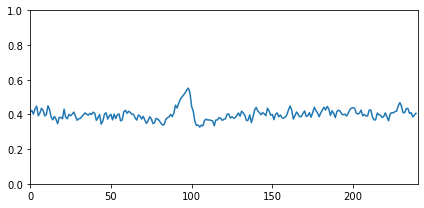

In [4]:
plot1d(x_train[0])

## Jittering

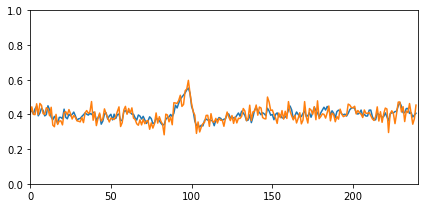

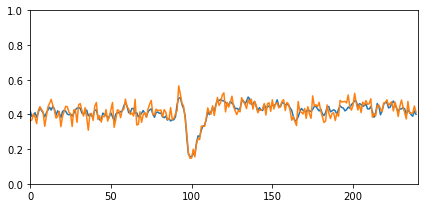

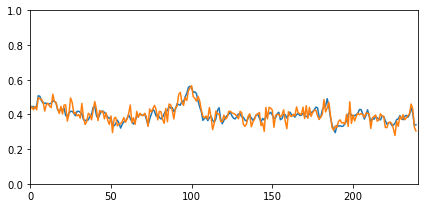

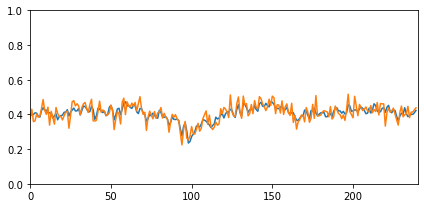

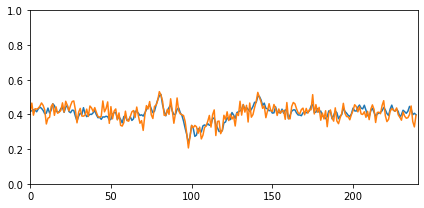

In [5]:
jitt = jitter(x_train)
for i in range(5):
    plot1d(x_train[i], jitt[i])

## Scaling

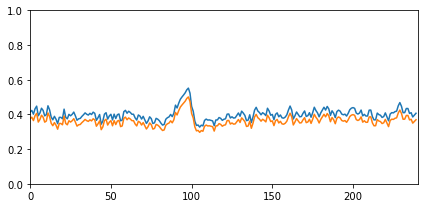

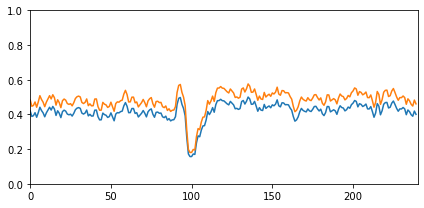

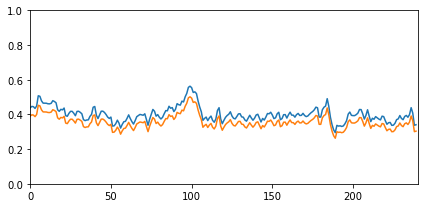

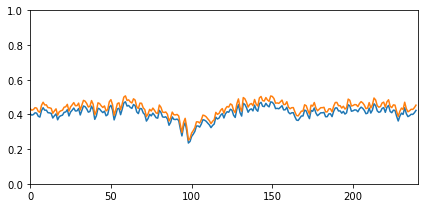

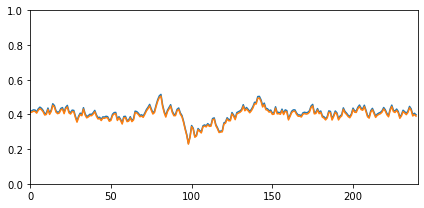

In [6]:
scal = scaling(x_train)
for i in range(5):
    plot1d(x_train[i], scal[i])

## Permutation

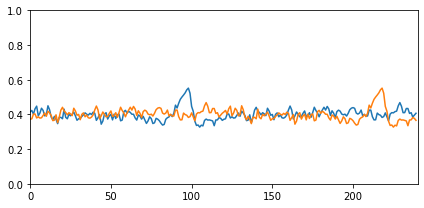

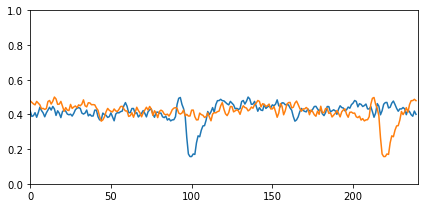

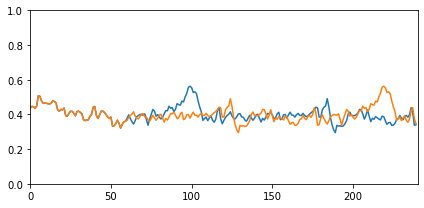

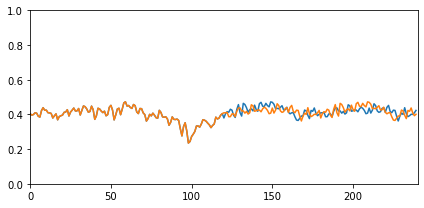

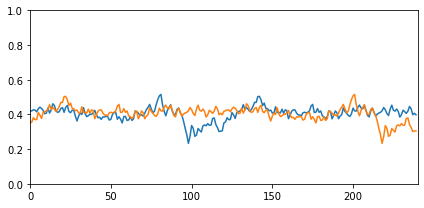

In [7]:
perm = permutation(x_train)
for i in range(5):
    plot1d(x_train[i], perm[i])

## Magnitude Warping

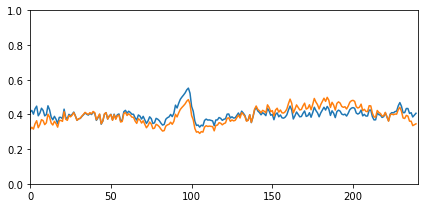

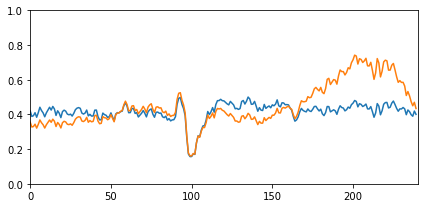

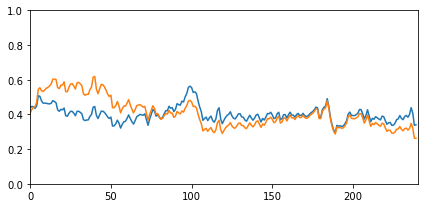

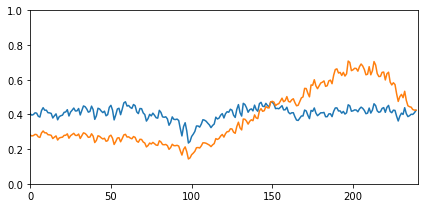

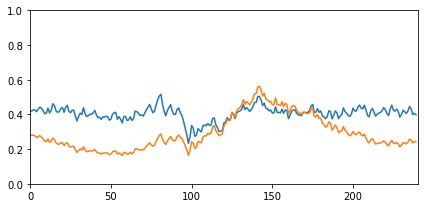

In [8]:
magn = magnitude_warp(x_train)
for i in range(5):
    plot1d(x_train[i], magn[i])

## Time Warping

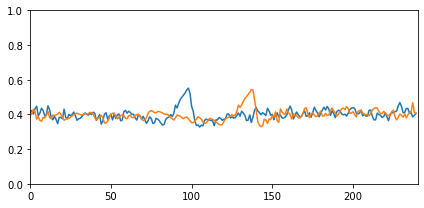

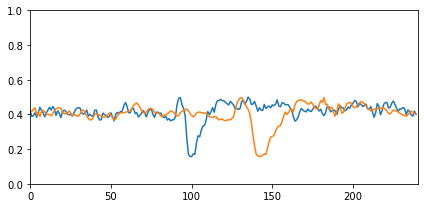

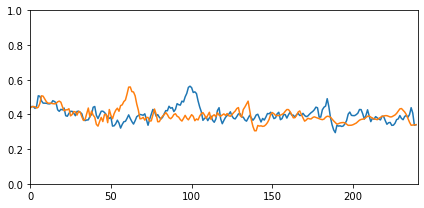

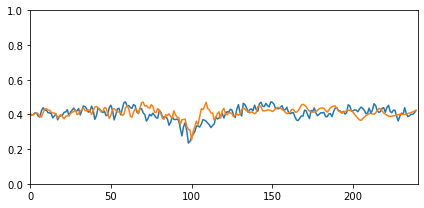

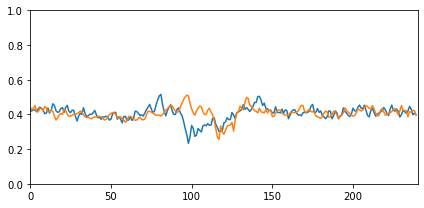

In [9]:
time = time_warp(x_train)
for i in range(5):
    plot1d(x_train[i], time[i])

## Rotation

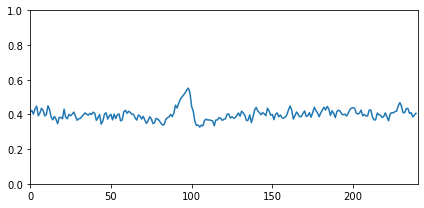

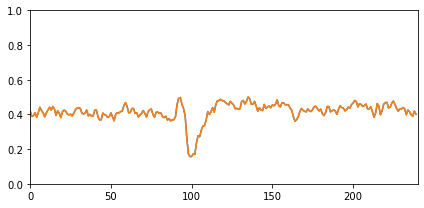

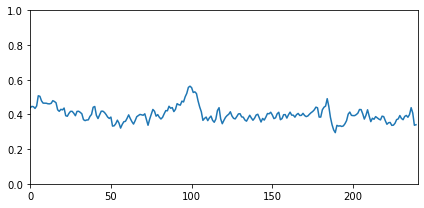

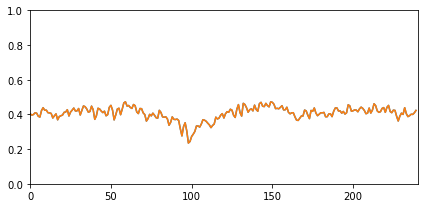

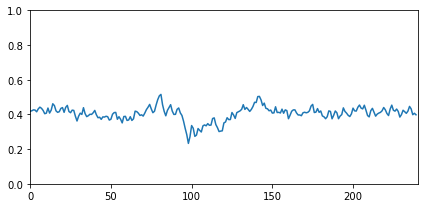

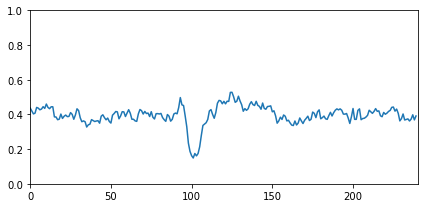

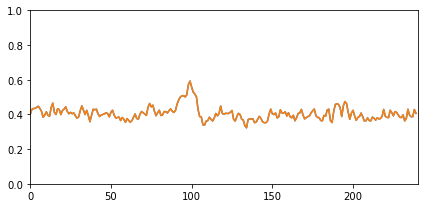

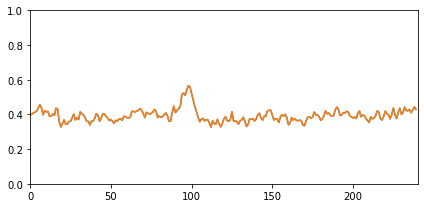

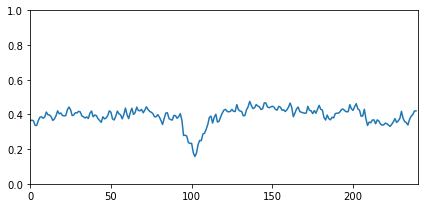

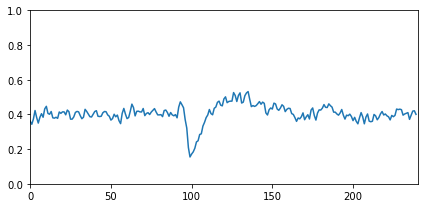

In [10]:
rota = rotation(x_train)
for i in range(10):
    plot1d(x_train[i], rota[i])

## Window Slicing

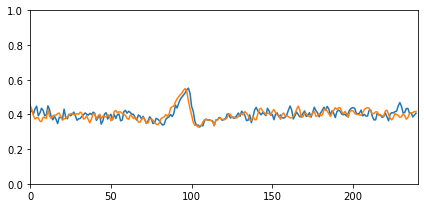

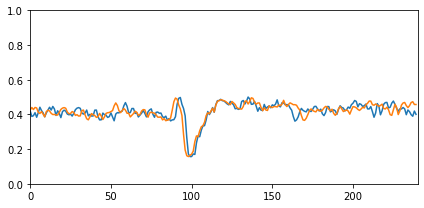

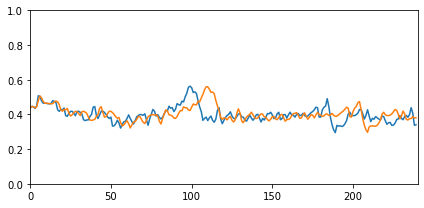

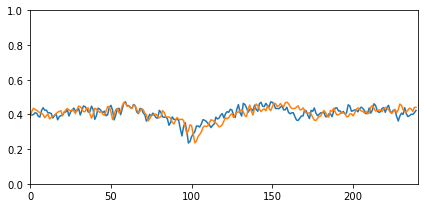

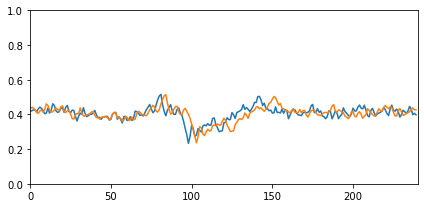

In [11]:
window = window_slice(x_train)
for i in range(5):
    plot1d(x_train[i], window[i])


## Window Warping

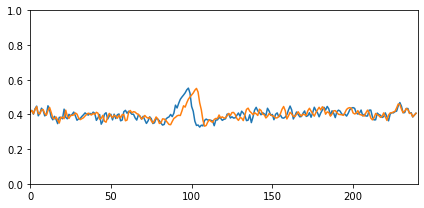

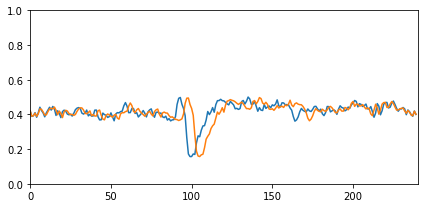

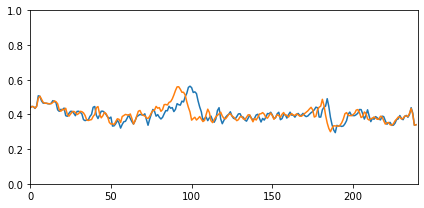

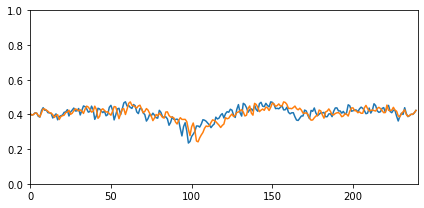

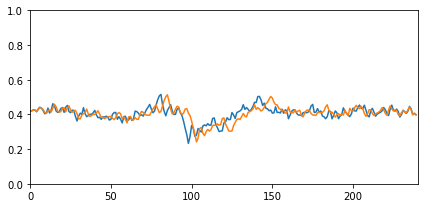

In [22]:
warp = window_warp(x_train,.9)
for i in range(5):
    plot1d(x_train[i], warp[i])

## Suboptimal Warping Time Series Generator (SPAWNER)

100%|██████████| 25520/25520 [05:57<00:00, 71.29it/s]


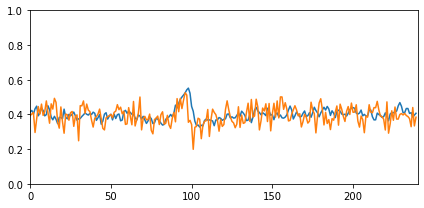

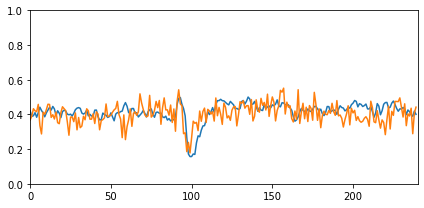

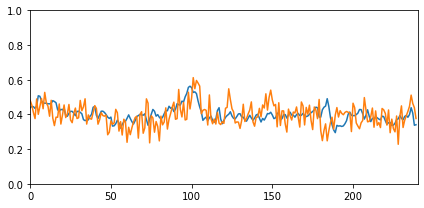

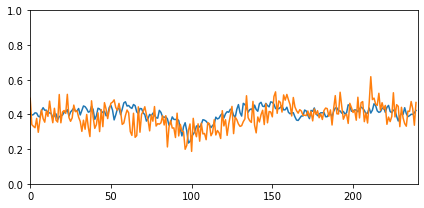

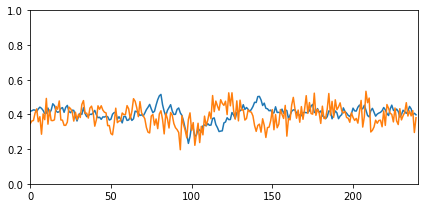

In [13]:
spawn = spawner(x_train, y_train)
for i in range(5):
    plot1d(x_train[i], spawn[i])

In [14]:
## Weighted Dynamic Time Series Barycenter Averaging (wDBA)

100%|██████████| 25520/25520 [2:55:02<00:00,  2.43it/s]  


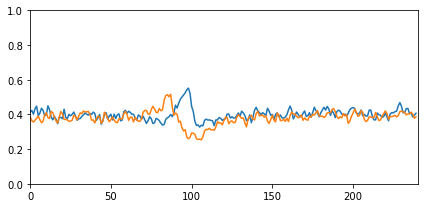

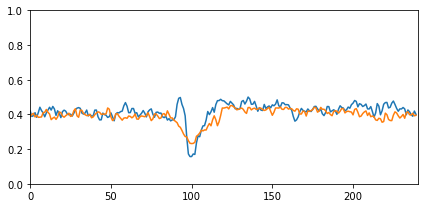

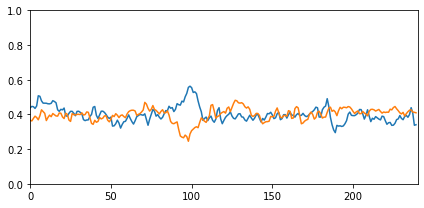

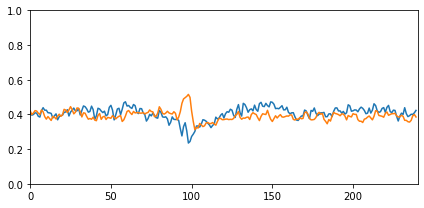

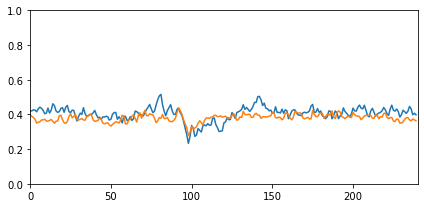

In [15]:
wdb = wdba(x_train, y_train)
for i in range(5):
    plot1d(x_train[i], wdb[i])


## Random Guided Warping

100%|██████████| 25520/25520 [05:48<00:00, 73.22it/s]


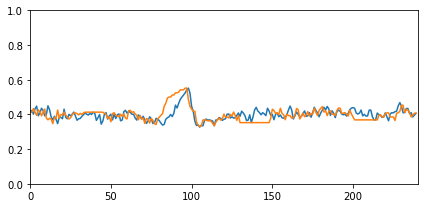

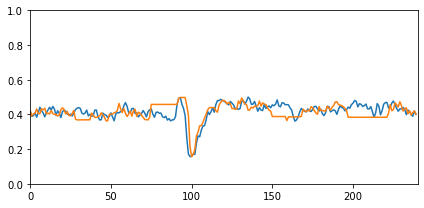

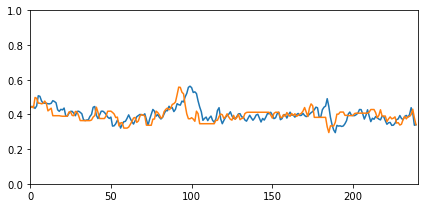

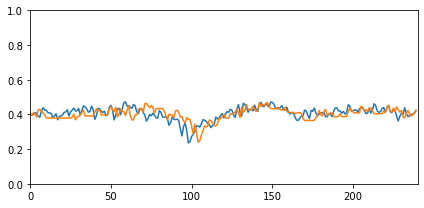

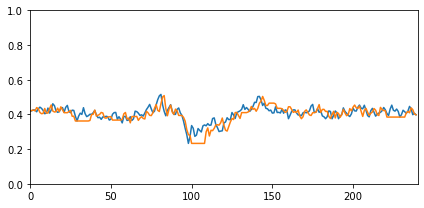

In [16]:
rgw = random_guided_warp(x_train, y_train)
for i in range(5):
    plot1d(x_train[i], rgw[i])

In [17]:
## Discriminative Guided Warping

100%|██████████| 25520/25520 [05:45<00:00, 73.80it/s]


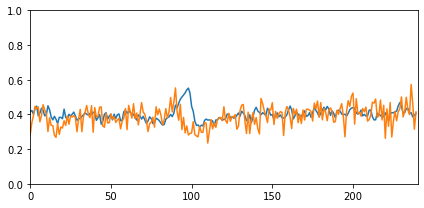

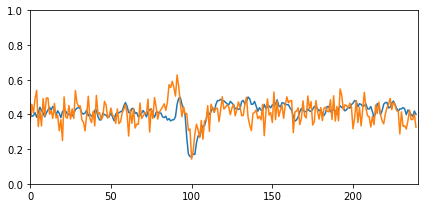

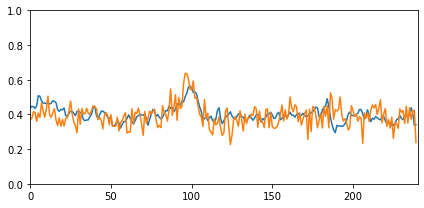

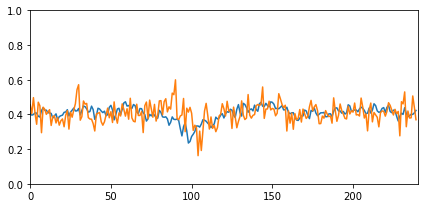

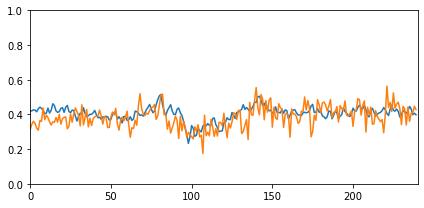

In [18]:
dgw = spawner(x_train, y_train)
for i in range(5):
    plot1d(x_train[i], dgw[i])